In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/Users/nandinik/Downloads/Data_Train.xlsx")

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
data1 = data.copy()

In [9]:
data1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data1.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [11]:
data1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## featurization of date of journey

In [12]:
def change_into_datetime(col):
    data1[col] = pd.to_datetime(data1[col])
    

In [13]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)


<ipython-input-12-12d41dc02df1>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1[col] = pd.to_datetime(data1[col])
<ipython-input-12-12d41dc02df1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1[col] = pd.to_datetime(data1[col])
<ipython-input-12-12d41dc02df1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1[col] = pd.to_datetime(data1[col])


In [14]:
data1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
data1['journey_day'] = data1['Date_of_Journey'].dt.day

In [16]:
data1['journey_month'] = data1['Date_of_Journey'].dt.month

In [17]:
data1['journey_year'] = data1['Date_of_Journey'].dt.year

In [18]:
data1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-20 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-20 05:50:00,2024-03-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [19]:
data1.drop('Date_of_Journey',axis =1, inplace=True)

In [20]:
data1.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-20 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-20 05:50:00,2024-03-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-20 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-03-20 18:05:00,2024-03-20 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-03-20 16:50:00,2024-03-20 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


## clean Dep_Time & Arrival_Time & featurize it

In [21]:
data1['Arrival_Time'].dtypes

dtype('<M8[ns]')

In [22]:
s = []
for ele in data1['Arrival_Time']:
    ans = str(ele)
    ans1 = ans.split(" ")
    ans2 = ans1[1]
    ans3 = ans2.split(":")
    s.append(ans3)
s

[['01', '10', '00'],
 ['13', '15', '00'],
 ['04', '25', '00'],
 ['23', '30', '00'],
 ['21', '35', '00'],
 ['11', '25', '00'],
 ['10', '25', '00'],
 ['05', '05', '00'],
 ['10', '25', '00'],
 ['19', '15', '00'],
 ['23', '00', '00'],
 ['22', '55', '00'],
 ['13', '55', '00'],
 ['09', '20', '00'],
 ['19', '50', '00'],
 ['19', '15', '00'],
 ['13', '15', '00'],
 ['12', '35', '00'],
 ['19', '15', '00'],
 ['12', '35', '00'],
 ['19', '20', '00'],
 ['13', '20', '00'],
 ['06', '50', '00'],
 ['21', '50', '00'],
 ['08', '15', '00'],
 ['12', '35', '00'],
 ['03', '35', '00'],
 ['12', '55', '00'],
 ['12', '35', '00'],
 ['09', '20', '00'],
 ['09', '20', '00'],
 ['23', '15', '00'],
 ['06', '50', '00'],
 ['12', '35', '00'],
 ['12', '35', '00'],
 ['21', '00', '00'],
 ['20', '20', '00'],
 ['16', '45', '00'],
 ['13', '15', '00'],
 ['19', '00', '00'],
 ['18', '10', '00'],
 ['15', '15', '00'],
 ['19', '00', '00'],
 ['13', '55', '00'],
 ['21', '00', '00'],
 ['08', '35', '00'],
 ['06', '50', '00'],
 ['13', '55',

In [23]:
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_min"] = df[col].dt.minute
    df.drop(col, axis=1,inplace = True)   ###axis = 1 coz wanted to drop it in vertical way
    return df
    

In [24]:
extract_hour_min(data1,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-03-20 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-03-20 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2024-03-20 22:25:00,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2024-03-20 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2024-03-20 11:20:00,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2024-03-20 14:10:00,2h 40m,non-stop,No info,12648,1,3,2019,11,30


In [25]:
extract_hour_min(data1,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


## lets analyse when will most of the flights will take-off

In [26]:
### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.
def flight_dep_time(x):
    if x>4 and x<=8:
        return 'Early morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Noon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    else:
        return 'Late Night'
        
    

In [27]:
data1['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

<AxesSubplot:xlabel='Dep_Time_hour'>

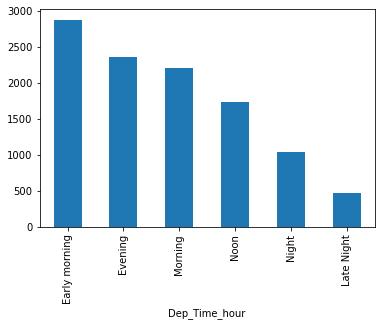

In [28]:
data1['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [29]:
data1.isnull().sum()

Airline              0
Source               0
Destination          0
Route                0
Duration             0
Total_Stops          0
Additional_Info      0
Price                0
journey_day          0
journey_month        0
journey_year         0
Dep_Time_hour        0
Dep_Time_min         0
Arrival_Time_hour    0
Arrival_Time_min     0
dtype: int64

In [30]:
!pip install plotly

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [31]:
pip install cufflinks

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs , init_notebook_mode, plot, iplot

In [33]:
cf.go_offline()

In [34]:
data1['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

## Pre-process Duration Feature & extract meaningful features

In [35]:
data1.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [36]:
def preprocess_duration(x):
    if x is None:
        x = '0h 0m'
    elif 'h'not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x + ' 0m'
    return x

In [37]:
data1['Duration'] = data1['Duration'].apply(preprocess_duration)

In [38]:
data1['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [39]:
data1['Duration'][0].split(" ")[0]

'2h'

In [40]:
data1['Duration'][0].split(" ")[0][0:-1]

'2'

In [41]:
type(data1['Duration'][0])

str

In [42]:
type(str(data1['Duration']))

str

In [43]:
data1['Duration_hours'] = data1['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [44]:
data1['Duration_mins'] = data1['Duration'].apply(lambda x:int(x.split( )[1][0:-1]))

In [45]:
data1.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


## Lets Analyse whether Duration impacts on Price or not ?

In [46]:
data1['Duration_total_min'] = data1['Duration'].str.replace('h', '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [47]:
data1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


In [48]:
import matplotlib.pyplot as plt

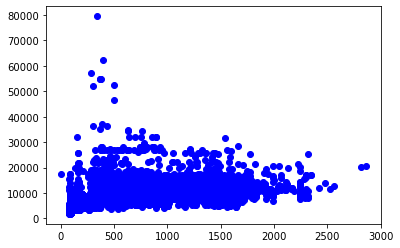

In [49]:
plt.scatter(data1['Duration_total_min'], data1['Price'], color = 'blue')


### pretty clear that As the duration of minutes increases Flight price also increases.

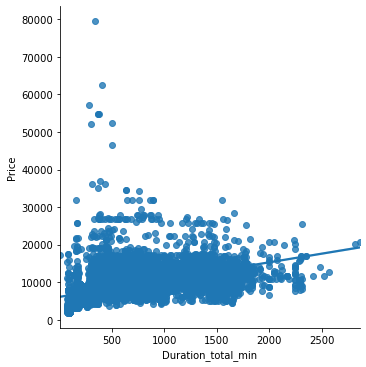

In [50]:
sns.lmplot(x = 'Duration_total_min', y= 'Price', data = data1)

## which city has maximum final destination of flights ?

<AxesSubplot:xlabel='Destination'>

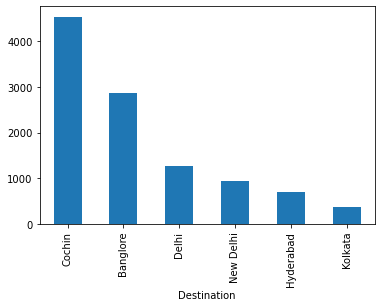

In [51]:
data1['Destination'].value_counts().plot(kind='bar')

# Inference->> 
# Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,


## Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights

In [52]:
data1['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [53]:
data1[data1['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## Airline vs Price Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

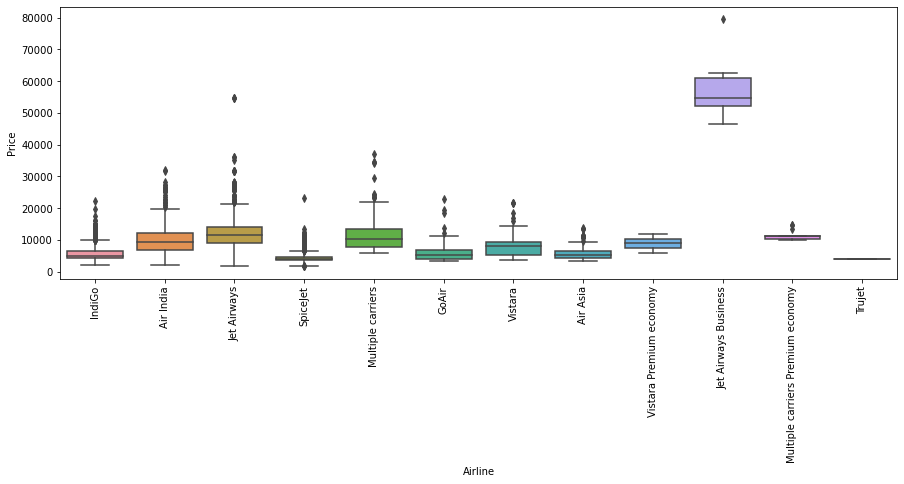

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

## Perform Feature-Encoding on Data

In [55]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
## lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"

data1.drop(columns=['Additional_Info','Route','Duration_total_min','journey_year'],axis=1,inplace=True)

In [56]:
data1.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

## Lets separate categorical data & numerical data 

In [57]:
cat_col = [col for col in data1.columns if data1[col].dtype=='object']

In [58]:
num_col = [col for col in data1.columns if data1[col].dtype!='object']

In [59]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [60]:
num_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_mins']

## Handling Categorical Data

In [61]:
for category in data['Source'].unique():
    data1['Source_'+category]=data1['Source'].apply(lambda x: 1 if x==category else 0)

In [62]:
data1.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


## Target Guided Mean Encoding

In [63]:
# ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..
# lets use Target Guided Mean Encoding in order to get rid of this

In [64]:
airlines=data1.groupby(['Airline'])['Price'].mean().sort_values().index

In [65]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [66]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [67]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [68]:
data1['Airline']=data1['Airline'].map(dict1)

In [69]:
len(data1['Airline'])

10682

In [70]:
data1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [71]:
data1['Destination'].replace('New Delhi','Delhi',inplace=True)

In [72]:
data1['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [73]:
dest=data1.groupby(['Destination'])['Price'].mean().sort_values().index

In [74]:
dict2={key:index for index,key in enumerate(dest,0)}

In [75]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [76]:
data1['Destination']=data1['Destination'].map(dict2)

In [77]:
data1.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


## Perform Manual Encoding on Total_stops feature

In [78]:
data1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [79]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [80]:
data1['Total_Stops']=data1['Total_Stops'].map(stops)

In [81]:
data1['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

### wherever I have price >35K just replacing it with median of Price (treating it as a outlier)

In [92]:
data1['Price']=np.where(data1['Price']>=35000,data1['Price'].median(),data1['Price'])

In [94]:
data1.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [95]:
data1.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


## Performing Feature Selection

In [96]:
from sklearn.feature_selection import mutual_info_regression

In [97]:
X=data1.drop(['Price'],axis=1)


In [98]:
X

,Airline,Destination,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,1,3,11,30,14,10,2,40,1,0,0,0,0


In [99]:
y=data1['Price']

In [100]:
X.dtypes

Airline              int64
Destination          int64
Total_Stops          int64
journey_day          int32
journey_month        int32
Dep_Time_hour        int32
Dep_Time_min         int32
Arrival_Time_hour    int32
Arrival_Time_min     int32
Duration_hours       int64
Duration_mins        int64
Source_Banglore      int64
Source_Kolkata       int64
Source_Delhi         int64
Source_Chennai       int64
Source_Mumbai        int64
dtype: object

In [101]:
mutual_info_regression(X,y)  ## how closely two vectors ar related to eachother

array([0.97898187, 0.99890592, 0.78924951, 0.23099384, 0.61948542,
       0.34102473, 0.26500566, 0.39606677, 0.34219603, 0.4680533 ,
       0.34409311, 0.39054916, 0.45487424, 0.52473079, 0.14086442,
       0.20297633])

In [102]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [103]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.011369
Airline,0.976203
Total_Stops,0.788554
journey_month,0.622360
Source_Delhi,0.532146
Duration_hours,0.474826
Source_Kolkata,0.461898
Arrival_Time_hour,0.396268
Source_Banglore,0.387476
Arrival_Time_min,0.346435


## build ML Model

In [ ]:
# split dataset into train & test

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
ml_model = RandomForestRegressor()

In [109]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [110]:
y_pred = ml_model.predict(X_test)

In [111]:
y_pred 

array([16834.68,  5461.48,  8841.29, ...,  3539.56,  6265.12,  6868.8 ])

In [112]:
from sklearn import metrics

In [113]:
metrics.r2_score(y_test , y_pred)

0.8117328741410241

## automating ml pipeline &  defining Evaluation metric..

In [ ]:
# make our own metric.

In [114]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [115]:
mape(y_test , y_pred)

13.148194869258084

In [ ]:
# automate ml pipeline

In [116]:
from sklearn import metrics

In [119]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    

In [120]:
predict(RandomForestRegressor())

Training score : 0.951760693224993
predictions are : [16869.68  5324.27  8772.51 ...  3509.49  6253.13  6895.68]


r2 score : 0.8115328919179126
MAE : 1178.4971395667644
MSE : 3669002.210243431
RMSE : 1915.4639673571078
MAPE : 13.226595452452186
